In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


# Data Understanding

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('/content/hotel_bookings . XLSX.csv')

In [5]:
df.head()

,hotel,is_canceled,arrival_year,arrival_month,arrival_date,stays_in_week_nights,adults,children,meal,country,market_segment,distribution_channel,booking_changes,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,0,2015,July,27,0,2,0.0,BB,PRT,Direct,Direct,3,No Deposit,Transient,Check-Out,01-07-2015
1,Resort Hotel,0,2015,July,27,0,2,0.0,BB,PRT,Direct,Direct,4,No Deposit,Transient,Check-Out,01-07-2015
2,Resort Hotel,0,2015,July,27,1,1,0.0,BB,GBR,Direct,Direct,0,No Deposit,Transient,Check-Out,02-07-2015
3,Resort Hotel,0,2015,July,27,1,1,0.0,BB,GBR,Corporate,Corporate,0,No Deposit,Transient,Check-Out,02-07-2015
4,Resort Hotel,0,2015,July,27,2,2,0.0,BB,GBR,Online TA,TA/TO,0,No Deposit,Transient,Check-Out,03-07-2015


In [6]:
df.tail()

,hotel,is_canceled,arrival_year,arrival_month,arrival_date,stays_in_week_nights,adults,children,meal,country,market_segment,distribution_channel,booking_changes,deposit_type,customer_type,reservation_status,reservation_status_date
119385,City Hotel,0,2017,August,35,5,2,0.0,BB,BEL,Offline TA/TO,TA/TO,0,No Deposit,Transient,Check-Out,06-09-2017
119386,City Hotel,0,2017,August,35,5,3,0.0,BB,FRA,Online TA,TA/TO,0,No Deposit,Transient,Check-Out,07-09-2017
119387,City Hotel,0,2017,August,35,5,2,0.0,BB,DEU,Online TA,TA/TO,0,No Deposit,Transient,Check-Out,07-09-2017
119388,City Hotel,0,2017,August,35,5,2,0.0,BB,GBR,Online TA,TA/TO,0,No Deposit,Transient,Check-Out,07-09-2017
119389,City Hotel,0,2017,August,35,7,2,0.0,HB,DEU,Online TA,TA/TO,0,No Deposit,Transient,Check-Out,07-09-2017


The dataset has information about two different hotel types, City Hotel and Resort Hotel. In this notebook we are going to clean our data and make a basis analysis. Both hotels are located in Portugal: H1 at the resort region of Algarve and H2 at the city of Lisbon!

The dataset that we are going to use contains the following columns:

hotels : hotels present in the area named as resort  hotel which gives an ocean view.

adults : number of adults

arrival_date : Date of the month of the arrival date

arrival_month : Month of arrival date with 12 categories: “January” to “December”

arrival_year : Year of arrival date

booking_changes : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.

children : Number of children.

customer_type : Type of booking, assuming one of four categories :

- Contract - when the booking has an allotment or other
  type of contract associated to it;
- Group – when the booking is associated to a group;
  Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
- Transient-party – when the booking is transient, but is associated to at least other transient booking


deposit_type : Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:

- No Deposit – no deposit was made.
- Non Refund – a deposit was made in the value of the
  total stay cost.
- Refundable – a deposit was made with a value under the
  total cost of stay.
- distribution_channel : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.

is_canceled : Value indicating if the booking was canceled (1) or not (0).

market_segment : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.

meal : Type of meal booked. Categories are presented in standard hospitality meal packages:

Undefined/SC – no meal package
BB – Bed & Breakfast
HB – Half board (breakfast and one other meal – usually dinner)
FB – Full board (breakfast, lunch and dinner)
previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking.

country : all the travellers belongs to which country or the residential proof.

reservation_status: Reservation last status, assuming one of three categories:

- Canceled – booking was canceled by the customer
- Check-Out – customer has checked in but already departed
- No-Show – customer did not check-in and did inform the
  hotel of the reason why
- reservation_status_date : Date at which the last status
  was set. This variable can be used in conjunction with
  the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel.

stays_in_week_nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.

distribution_channel : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators".

In [7]:
df.shape

(119390, 17)

In [8]:
df.describe()

,is_canceled,arrival_year,arrival_date,stays_in_week_nights,adults,children,booking_changes
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000
mean,0.370416,2016.156554,27.165173,2.500302,1.856403,0.103890,0.221124
std,0.482918,0.707476,13.605138,1.908286,0.579261,0.398561,0.652306
min,0.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2016.000000,16.000000,1.000000,2.000000,0.000000,0.000000
50%,0.000000,2016.000000,28.000000,2.000000,2.000000,0.000000,0.000000
75%,1.000000,2017.000000,38.000000,3.000000,2.000000,0.000000,0.000000
max,1.000000,2017.000000,53.000000,50.000000,55.000000,10.000000,21.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   hotel                    119390 non-null  object 
 1   is_canceled              119390 non-null  int64  
 2   arrival_year             119390 non-null  int64  
 3   arrival_month            119390 non-null  object 
 4   arrival_date             119390 non-null  int64  
 5   stays_in_week_nights     119390 non-null  int64  
 6   adults                   119390 non-null  int64  
 7   children                 119386 non-null  float64
 8   meal                     119390 non-null  object 
 9   country                  118902 non-null  object 
 10  market_segment           119390 non-null  object 
 11  distribution_channel     119390 non-null  object 
 12  booking_changes          119390 non-null  int64  
 13  deposit_type             119390 non-null  object 
 14  cust

In [10]:
df.nunique()

,0
hotel,2
is_canceled,2
arrival_year,3
arrival_month,12
arrival_date,53
stays_in_week_nights,35
adults,14
children,5
meal,5
country,177


# Data Cleaning
In this section we will process the data by checking and replacing, cleaning data for deeper analysis.

# Check for missing values in data
There are some missing values(children,country, agent, hotel)

In [11]:
# Check burned values
df.isnull().sum()

,0
hotel,0
is_canceled,0
arrival_year,0
arrival_month,0
arrival_date,0
stays_in_week_nights,0
adults,0
children,4
meal,0
country,488


In [12]:
# Check the percentage of missing values
df.isna().mean()

,0
hotel,0.000000
is_canceled,0.000000
arrival_year,0.000000
arrival_month,0.000000
arrival_date,0.000000
stays_in_week_nights,0.000000
adults,0.000000
children,0.000034
meal,0.000000
country,0.004087


Fill and Replace missing values in columns

Now we will fill the missing values by:
- For the Children and Agent cores, we will use the
  average values to replace them.
- For the Country core we will use the preference    
  method , which will replace the burned values with the   most frequent

In [13]:
# Replace missing values with median values for Children column
df['children'] = df['children'].fillna(df['children'].median())

In [14]:
# Which country's news has the higest frequency of appearence?
df['country'].mode()[0]

'PRT'

In [15]:
# Replace burned values with the most frequent country for the Country column
df['country'].fillna(df['country'].mode()[0], inplace=True)

In [16]:
# Result after processing null values
df.isnull().sum()

,0
hotel,0
is_canceled,0
arrival_year,0
arrival_month,0
arrival_date,0
stays_in_week_nights,0
adults,0
children,0
meal,0
country,0


In [17]:
df['arrival_year'] = df['arrival_year'].apply(str)


In [18]:
# Check for duplicate values
df.duplicated() .sum()

np.int64(43010)

In [19]:
# Remove duplicate values
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
df.shape

(76380, 17)

# Check for logic errors
We have two cores here such as children and adults. We can see that there are n rows of them all containing zeros.

In [22]:
# Filter data
filter = (df.adults == 0) & (df.children == 0)
df[filter]

,hotel,is_canceled,arrival_year,arrival_month,arrival_date,stays_in_week_nights,adults,children,meal,country,market_segment,distribution_channel,booking_changes,deposit_type,customer_type,reservation_status,reservation_status_date
2224,Resort Hotel,0,2015,October,41,3,0,0.0,SC,PRT,Corporate,Corporate,1,No Deposit,Transient-Party,Check-Out,06-10-2015
2409,Resort Hotel,0,2015,October,42,0,0,0.0,SC,PRT,Corporate,Corporate,0,No Deposit,Transient,Check-Out,12-10-2015
3181,Resort Hotel,0,2015,November,47,2,0,0.0,SC,ESP,Groups,TA/TO,0,No Deposit,Transient-Party,Check-Out,23-11-2015
3684,Resort Hotel,0,2015,December,53,4,0,0.0,SC,PRT,Groups,TA/TO,1,No Deposit,Transient-Party,Check-Out,04-01-2016
3708,Resort Hotel,0,2015,December,53,4,0,0.0,SC,PRT,Groups,TA/TO,1,No Deposit,Transient-Party,Check-Out,05-01-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,2017,June,26,3,0,0.0,BB,CHE,Online TA,TA/TO,1,No Deposit,Transient,Check-Out,30-06-2017
115091,City Hotel,0,2017,June,26,1,0,0.0,SC,PRT,Complementary,Direct,0,No Deposit,Transient,Check-Out,01-07-2017
116251,City Hotel,0,2017,July,28,1,0,0.0,SC,SWE,Online TA,TA/TO,2,No Deposit,Transient,Check-Out,17-07-2017
116534,City Hotel,0,2017,July,28,5,0,0.0,SC,RUS,Online TA,TA/TO,1,No Deposit,Transient-Party,Check-Out,22-07-2017


In [23]:
# Delete rows with logic
indexguest = df[(df['children'] == 0) & (df['adults'] == 0)].index
df.drop(indexguest , inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)
df.head()


,hotel,is_canceled,arrival_year,arrival_month,arrival_date,stays_in_week_nights,adults,children,meal,country,market_segment,distribution_channel,booking_changes,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,0,2015,July,27,0,2,0.0,BB,PRT,Direct,Direct,3,No Deposit,Transient,Check-Out,01-07-2015
1,Resort Hotel,0,2015,July,27,0,2,0.0,BB,PRT,Direct,Direct,4,No Deposit,Transient,Check-Out,01-07-2015
2,Resort Hotel,0,2015,July,27,1,1,0.0,BB,GBR,Direct,Direct,0,No Deposit,Transient,Check-Out,02-07-2015
3,Resort Hotel,0,2015,July,27,1,1,0.0,BB,GBR,Corporate,Corporate,0,No Deposit,Transient,Check-Out,02-07-2015
4,Resort Hotel,0,2015,July,27,2,2,0.0,BB,GBR,Online TA,TA/TO,0,No Deposit,Transient,Check-Out,03-07-2015


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76218 entries, 0 to 76217
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hotel                    76218 non-null  object 
 1   is_canceled              76218 non-null  int64  
 2   arrival_year             76218 non-null  object 
 3   arrival_month            76218 non-null  object 
 4   arrival_date             76218 non-null  int64  
 5   stays_in_week_nights     76218 non-null  int64  
 6   adults                   76218 non-null  int64  
 7   children                 76218 non-null  float64
 8   meal                     76218 non-null  object 
 9   country                  76218 non-null  object 
 10  market_segment           76218 non-null  object 
 11  distribution_channel     76218 non-null  object 
 12  booking_changes          76218 non-null  int64  
 13  deposit_type             76218 non-null  object 
 14  customer_type         

In [25]:
df.shape

(76218, 17)

In [26]:
df.to_csv('/content/hotel_bookings . XLSX.csv',index=False)


# DATA ANALYSIS


In [27]:
kohuy = df[df['is_canceled'] == 0]
kohuy.head()

,hotel,is_canceled,arrival_year,arrival_month,arrival_date,stays_in_week_nights,adults,children,meal,country,market_segment,distribution_channel,booking_changes,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,0,2015,July,27,0,2,0.0,BB,PRT,Direct,Direct,3,No Deposit,Transient,Check-Out,01-07-2015
1,Resort Hotel,0,2015,July,27,0,2,0.0,BB,PRT,Direct,Direct,4,No Deposit,Transient,Check-Out,01-07-2015
2,Resort Hotel,0,2015,July,27,1,1,0.0,BB,GBR,Direct,Direct,0,No Deposit,Transient,Check-Out,02-07-2015
3,Resort Hotel,0,2015,July,27,1,1,0.0,BB,GBR,Corporate,Corporate,0,No Deposit,Transient,Check-Out,02-07-2015
4,Resort Hotel,0,2015,July,27,2,2,0.0,BB,GBR,Online TA,TA/TO,0,No Deposit,Transient,Check-Out,03-07-2015


In [28]:
kohuy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53175 entries, 0 to 76217
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hotel                    53175 non-null  object 
 1   is_canceled              53175 non-null  int64  
 2   arrival_year             53175 non-null  object 
 3   arrival_month            53175 non-null  object 
 4   arrival_date             53175 non-null  int64  
 5   stays_in_week_nights     53175 non-null  int64  
 6   adults                   53175 non-null  int64  
 7   children                 53175 non-null  float64
 8   meal                     53175 non-null  object 
 9   country                  53175 non-null  object 
 10  market_segment           53175 non-null  object 
 11  distribution_channel     53175 non-null  object 
 12  booking_changes          53175 non-null  int64  
 13  deposit_type             53175 non-null  object 
 14  customer_type            53

In [29]:
kohuy.describe()

,is_canceled,arrival_date,stays_in_week_nights,adults,children,booking_changes
count,53175.0,53175.000000,53175.000000,53175.000000,53175.000000,53175.000000
mean,0.0,26.844701,2.569384,1.866253,0.138900,0.340668
std,0.0,13.816449,2.028939,0.516308,0.450592,0.791378
min,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,15.000000,1.000000,2.000000,0.000000,0.000000
50%,0.0,28.000000,2.000000,2.000000,0.000000,0.000000
75%,0.0,37.000000,3.000000,2.000000,0.000000,0.000000
max,0.0,53.000000,50.000000,4.000000,3.000000,18.000000


In [30]:
kohuy.describe(include=['O'])

,hotel,arrival_year,arrival_month,meal,country,market_segment,distribution_channel,deposit_type,customer_type,reservation_status,reservation_status_date
count,53175,53175,53175,53175,53175,53175,53175,53175,53175,53175,53175
unique,2,3,12,5,165,7,5,3,4,1,805
top,City Hotel,2016,August,BB,PRT,Online TA,TA/TO,No Deposit,Transient,Check-Out,25-05-2017
freq,31882,25990,6765,41546,14065,28761,40225,53073,43163,53175,133


In [32]:
country_counts = kohuy['country'].value_counts().reset_index()
country_counts.columns = ['country', 'No of guests']
country_counts


,country,No of guests
0,PRT,14065
1,GBR,6922
2,FRA,5717
3,ESP,4568
4,DEU,3665
...,...,...
160,KIR,1
161,ATF,1
162,TJK,1
163,SLE,1


In [33]:
indexguest2 = country_counts[(country_counts['No of guests'] < 200)].index
country_counts.drop(indexguest2 , inplace=True)
country_counts


,country,No of guests
0,PRT,14065
1,GBR,6922
2,FRA,5717
3,ESP,4568
4,DEU,3665
5,IRL,2061
6,ITA,1786
7,BEL,1525
8,NLD,1424
9,USA,1313


<Axes: xlabel='country'>

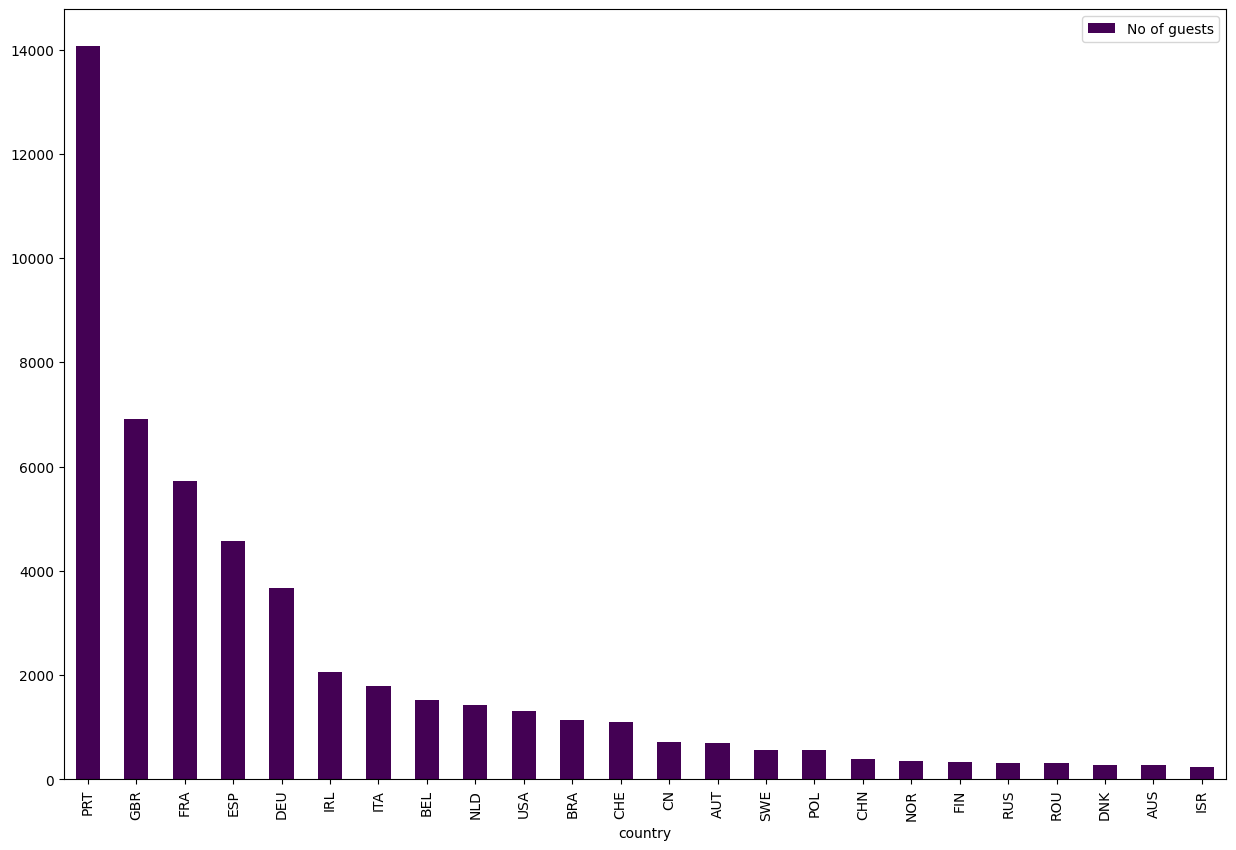

In [35]:
country_counts.plot(kind='bar',x='country',y='No of guests',figsize=(15,10), colormap='viridis')

In [36]:
dahuy = df[df['is_canceled'] == 1]
dahuy.head()

,hotel,is_canceled,arrival_year,arrival_month,arrival_date,stays_in_week_nights,adults,children,meal,country,market_segment,distribution_channel,booking_changes,deposit_type,customer_type,reservation_status,reservation_status_date
7,Resort Hotel,1,2015,July,27,3,2,0.0,BB,PRT,Online TA,TA/TO,0,No Deposit,Transient,Canceled,06-05-2015
8,Resort Hotel,1,2015,July,27,3,2,0.0,HB,PRT,Offline TA/TO,TA/TO,0,No Deposit,Transient,Canceled,22-04-2015
9,Resort Hotel,1,2015,July,27,4,2,0.0,BB,PRT,Online TA,TA/TO,0,No Deposit,Transient,Canceled,23-06-2015
24,Resort Hotel,1,2015,July,27,5,2,0.0,BB,PRT,Online TA,TA/TO,0,No Deposit,Transient,Canceled,11-05-2015
28,Resort Hotel,1,2015,July,27,8,2,0.0,BB,PRT,Direct,Direct,0,No Deposit,Transient,Canceled,29-05-2015


In [37]:
# Check the "reservation_status"column, we can see that it only has the values"Canceled"
dahuy['reservation_status'].unique()

array(['Canceled', 'No-Show'], dtype=object)

In [38]:
dahuy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23043 entries, 7 to 74613
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hotel                    23043 non-null  object 
 1   is_canceled              23043 non-null  int64  
 2   arrival_year             23043 non-null  object 
 3   arrival_month            23043 non-null  object 
 4   arrival_date             23043 non-null  int64  
 5   stays_in_week_nights     23043 non-null  int64  
 6   adults                   23043 non-null  int64  
 7   children                 23043 non-null  float64
 8   meal                     23043 non-null  object 
 9   country                  23043 non-null  object 
 10  market_segment           23043 non-null  object 
 11  distribution_channel     23043 non-null  object 
 12  booking_changes          23043 non-null  int64  
 13  deposit_type             23043 non-null  object 
 14  customer_type            23

In [39]:
dahuy.describe()

,is_canceled,arrival_date,stays_in_week_nights,adults,children,booking_changes
count,23043.0,23043.000000,23043.000000,23043.000000,23043.00000,23043.000000
mean,1.0,26.865729,2.914334,1.963112,0.19277,0.164519
std,0.0,12.970500,2.169464,0.838713,0.54083,0.586251
min,1.0,1.000000,0.000000,0.000000,0.00000,0.000000
25%,1.0,17.000000,1.000000,2.000000,0.00000,0.000000
50%,1.0,27.000000,3.000000,2.000000,0.00000,0.000000
75%,1.0,35.000000,4.000000,2.000000,0.00000,0.000000
max,1.0,53.000000,40.000000,55.000000,10.00000,16.000000


In [40]:
dahuy.describe(include=['O'])

,hotel,arrival_year,arrival_month,meal,country,market_segment,distribution_channel,deposit_type,customer_type,reservation_status,reservation_status_date
count,23043,23043,23043,23043,23043,23043,23043,23043,23043,23043,23043
unique,2,3,12,5,127,8,5,3,4,2,902
top,City Hotel,2016,August,BB,PRT,Online TA,TA/TO,No Deposit,Transient,Canceled,21-10-2015
freq,15423,10788,3519,17220,9207,17701,20570,22224,20870,22077,120


# DATA VISUALISATION
Dataset columns ploted in various types of graphs.

Text(0.5, 1.0, 'Cancellation vs Hotel Type')

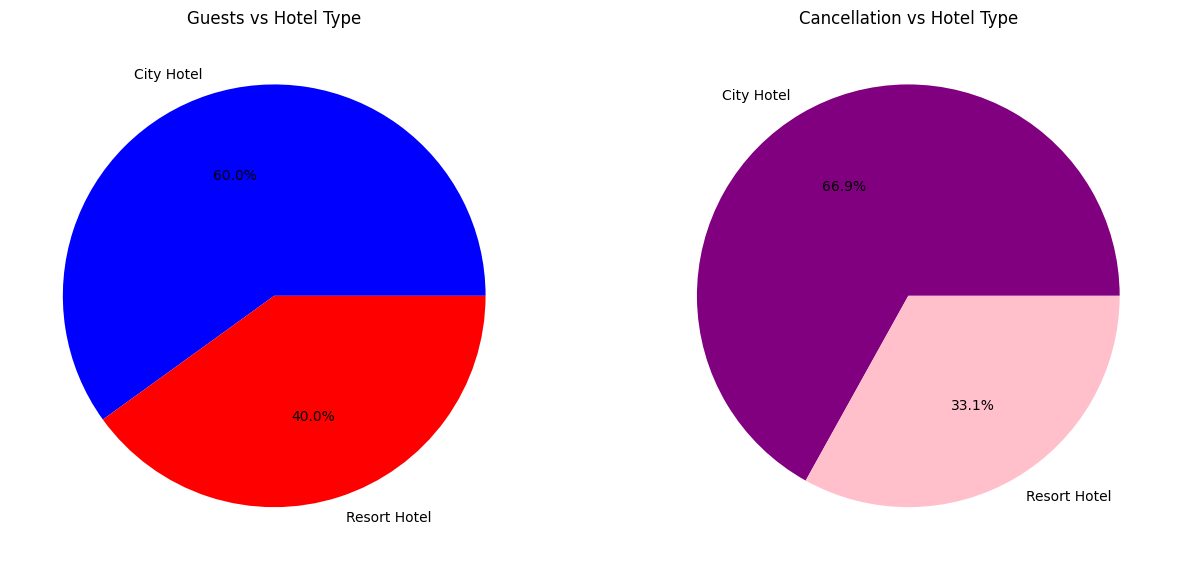

In [42]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,15))

ax1.pie(kohuy['hotel'].value_counts(),
        labels=['City Hotel', 'Resort Hotel'],
        autopct = '%1.1f%%',
        colors=['blue', 'red'])
ax1.set_title('Guests vs Hotel Type')


ax2.pie(dahuy['hotel'].value_counts(),
        labels=['City Hotel', 'Resort Hotel'],
        autopct = '%1.1f%%',
        colors=['purple', 'pink'])
ax2.set_title('Cancellation vs Hotel Type')


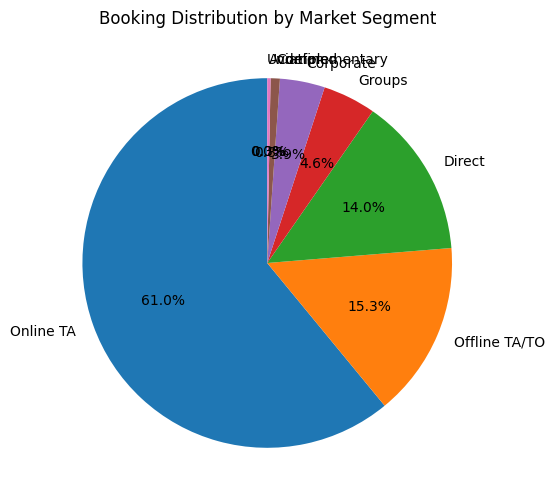

In [49]:
plt.figure(figsize=(8, 6))
df['market_segment'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Booking Distribution by Market Segment')
plt.ylabel('')
plt.show()

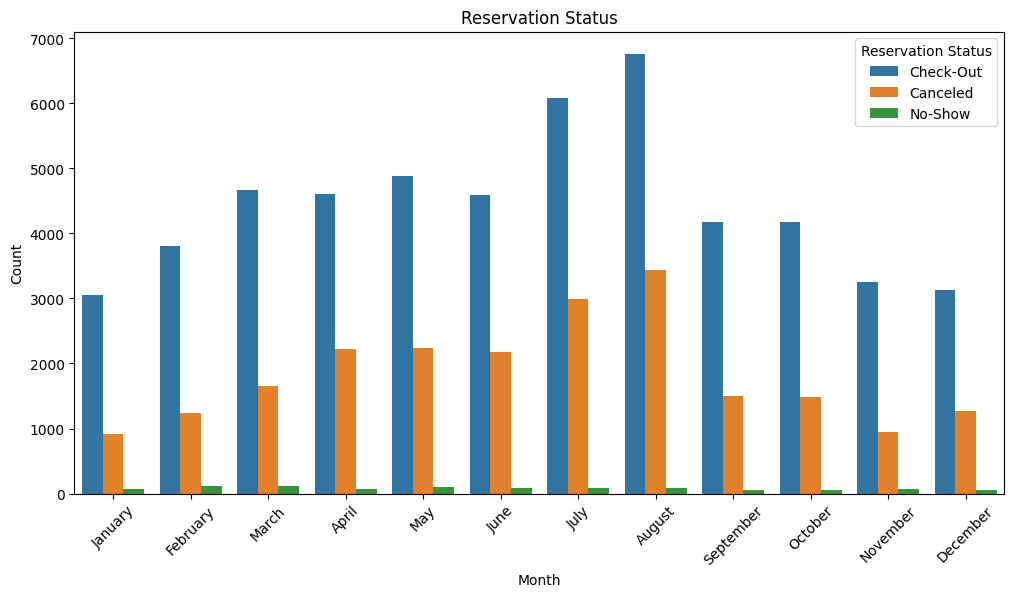

In [53]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='arrival_month', hue='reservation_status', order=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Reservation Status')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Reservation Status')
plt.xticks(rotation=45)
plt.show()

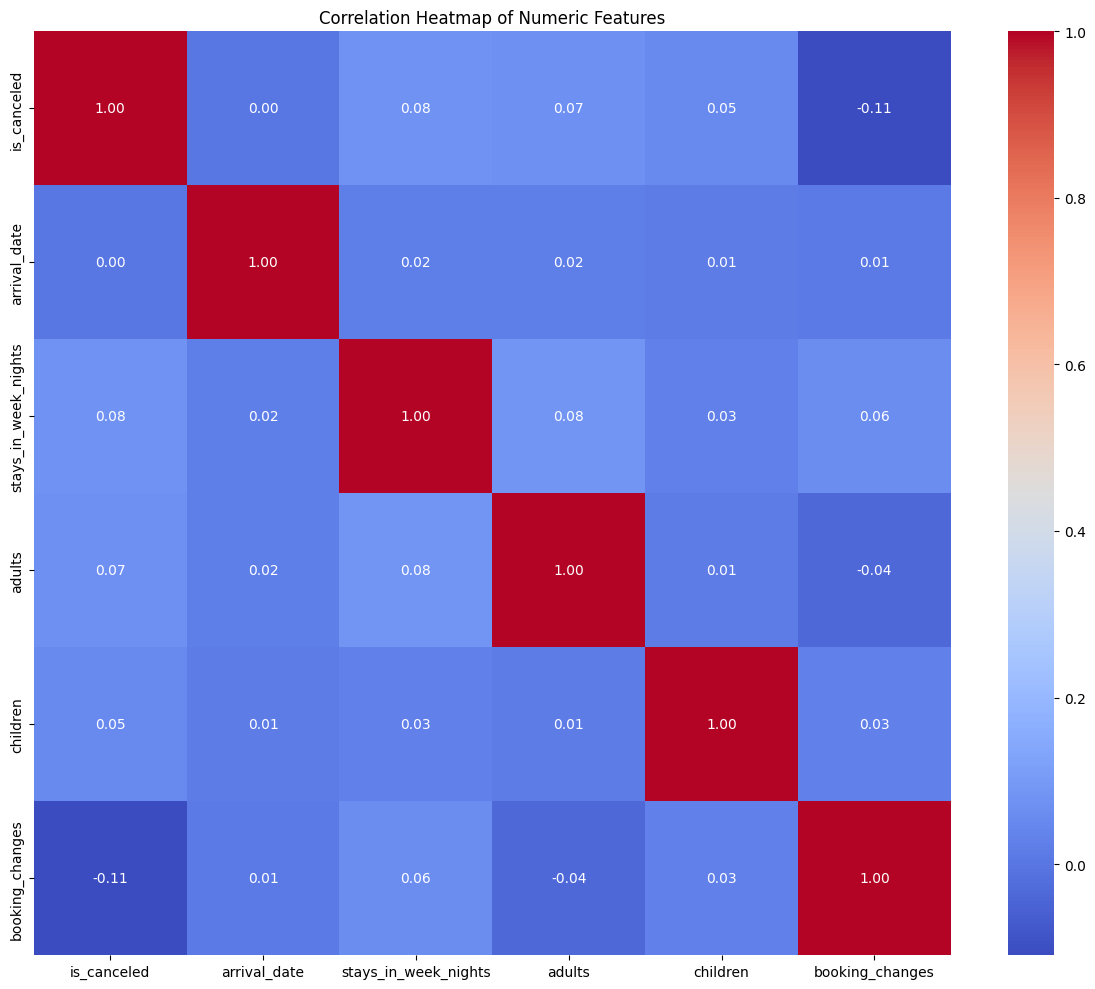

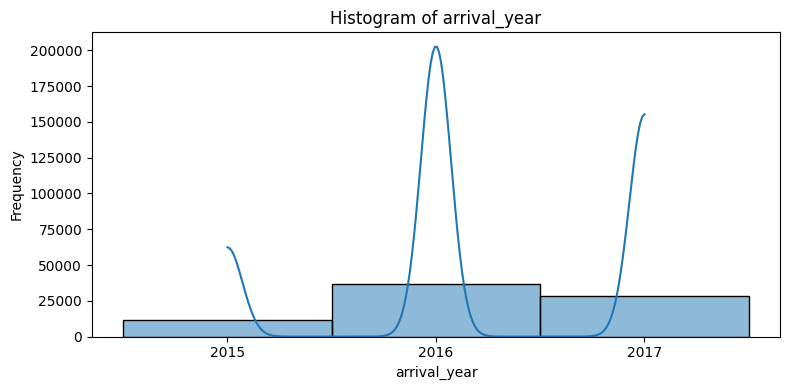

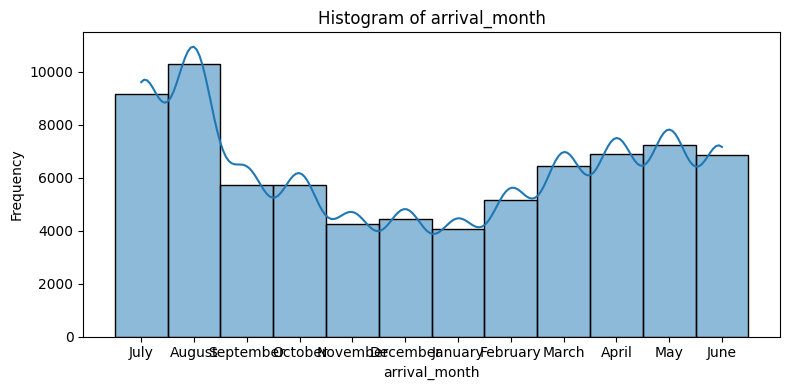

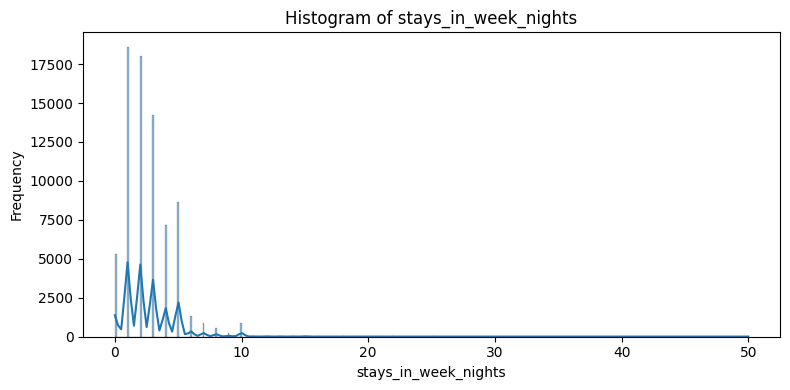

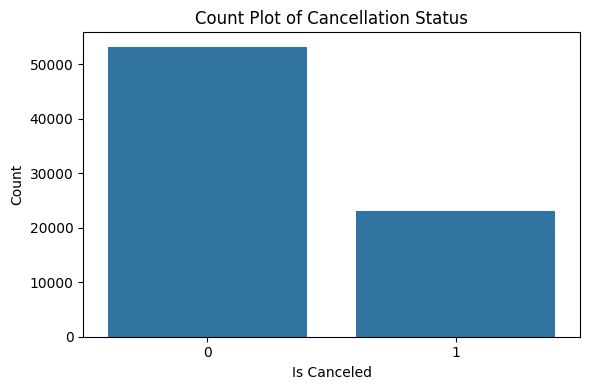

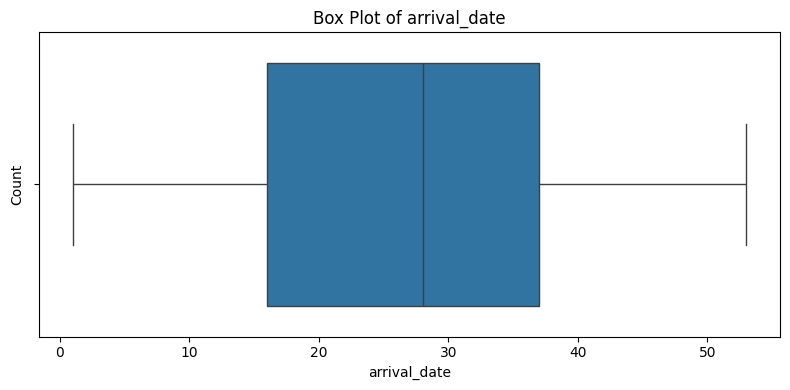

In [54]:
# Exploratory Data Analysis (EDA)

# Correlation Heatmap
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(12, 10))
    sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title("Correlation Heatmap of Numeric Features")
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns for a correlation heatmap.")

# Histograms for select numeric features to inspect distributions and potential outliers
features_to_plot = ['arrival_year', 'arrival_month', 'stays_in_week_nights']
for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Pie chart / Count plot for cancellation status
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='is_canceled')
plt.title("Count Plot of Cancellation Status")
plt.xlabel("Is Canceled")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Box plot to identify outliers in the 'lead_time'
plt.figure(figsize=(8,4))
sns.boxplot(x=df['arrival_date'])
plt.title("Box Plot of arrival_date")
plt.xlabel("arrival_date")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Answer the question for analysis
Why are there the most customers in August?
- In Portugal (and many European countries), August is the most popular month for vacations. Many companies and offices even close or reduce their operations during this month so that employees can take a summer vacation. Families with young children also choose August because it coincides with the school summer vacation.

- Portuguese people often stay in hotels in August because it is the peak summer season, the traditional vacation month, and domestic travel is the most popular & convenient option.

- Assumption of the Virgin Mary - A religious & traditional holiday that takes place on August 15, is one of the most important Catholic holidays in Portugal. This is an official national holiday --> people have the day off from work, many people take advantage of the long weekend to combine it with travel.

- The “long weekend” effect - If August 15 falls on a Tuesday or Thursday, people often take an extra Monday or Friday off to have a 4-day holiday ("ponte"). Even if it falls in the middle of the week, many people still take leave to combine it with summer vacation --> causing the demand for hotel bookings to increase.

# Why was there a surge in the number of visitors in 2016?

- During this period, many Mediterranean countries such as Tunisia, Türkiye and Egypt experienced security instability events, causing tourists to seek safer destinations. Portugal, with its stable and safe environment, has become an attractive alternative for many tourists.

- The Portuguese government has invested heavily in upgrading and expanding tourism infrastructure, including improving airports and transport systems, making it more convenient for tourists to travel.

- Portugal has launched many international tourism promotion campaigns, emphasizing the country's unique culture, rich cuisine and beautiful natural landscapes, attracting the attention of global tourists. Combined with the growth of traditional tourism markets --> creating a resounding success for the Portuguese tourism industry.

# Why is online travel agency the most popular booking method?

- Convenient and easy to compare prices: Platforms such as Booking.com, Expedia, Trivago... allow you to compare many hotels, reviews, prices in just a few clicks. Consumers can choose the best option based on their budget, location, amenities, and real reviews.

- Strong marketing strategy: OTAs have strong advertising campaigns, often discount and promote --> attract users. Many hotels prioritize displaying available rooms on OTAs first to increase bookings.

- Flexible cancellation policy: This is a huge attraction: "Book in advance, cancel for free" - suitable for those who want flexible plans. Especially popular with domestic guests like the Portuguese, because they can easily change their plans at the last minute. Therefore, it also has the highest cancellation rate!

# How to solve the above problem:

- Improve service quality, build a loyalty program and provide memorable experiences for visitors --> Increase the rate of returning guests.

- Renovate the appearance of the hotel to make it more prominent and offer special incentives to attract guests. For example: if guests often return, there will be a special discount!

- Research competitors to understand why they attract more guests than you and from there build reasonable plans.